<img src="Ref/ML_ZTM/sklearn-workflow-title.png"/>

#### Standard Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno  # Missingno is a visualization suite used to visualize missing data 

# **Data Preprocessing: Getting the Data Ready**

#### Main things to do in the Data Preprocessing Workflow:

        1. Handling Missing Values: Data Imputation and Removal of Undesired Entries from the Dataset.
        2. Standardization: Transforming the Numerical Variables Such that the Mean is 0 and the Standard Deviation is 1.
        3. Feature Engineering
        4. Features & Target Extraction: Splitting the Dataset into Feature Variables(X) & Target Variable(y).
        5. Splitting the Dataset into Training & Test Set.
        6. Encoding (Handling Categorical Variables): Converting Non-numerical Features & Target to Numerical Values.
**N.B.** `You don't have to follow these steps in sequential order. In fact you shouldn't. Keep in mind that the Dataset and The Machine Learning Model of choice dictates what to do first. Even sometimes you may skip one or multiple steps based on the situation.`

> To understand the whole Data Preprocessing workflow read: https://www.notion.so/Processing-the-Raw-Data-into-Desired-Shape-4bf3714d18e34ecf99c62897cb7c4367

In [2]:
# Importing the Dataset
car_sales = pd.read_csv("SklearnSampleData/car_sales.csv")

In [3]:
car_sales.sample(5)

,Make,Colour,Odometer (KM),Doors,Price
776,Toyota,Blue,61337.0,4.0,28830.0
380,Nissan,Blue,76412.0,4.0,13492.0
482,Nissan,White,51004.0,4.0,31633.0
640,Honda,White,237209.0,4.0,10494.0
495,BMW,Black,181572.0,5.0,25763.0


In [4]:
# Checking the number of samples(observations/rows) that have missing values in each column of the dataset.
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

> **What to Do with this Particular Dataset?:** Examining the Dataset, we came up with Four following operations in order to make Machine Learning Predictions Using this Car Sales Dataset.

        1. Handling Missing Values
        2. Features & Target Extraction
        3. Splitting the Dataset into Training & Test Set.
        4. Encoding

### **A.** Handling Missing Values

- #### Handling missing values **Using Pandas**

<AxesSubplot:>

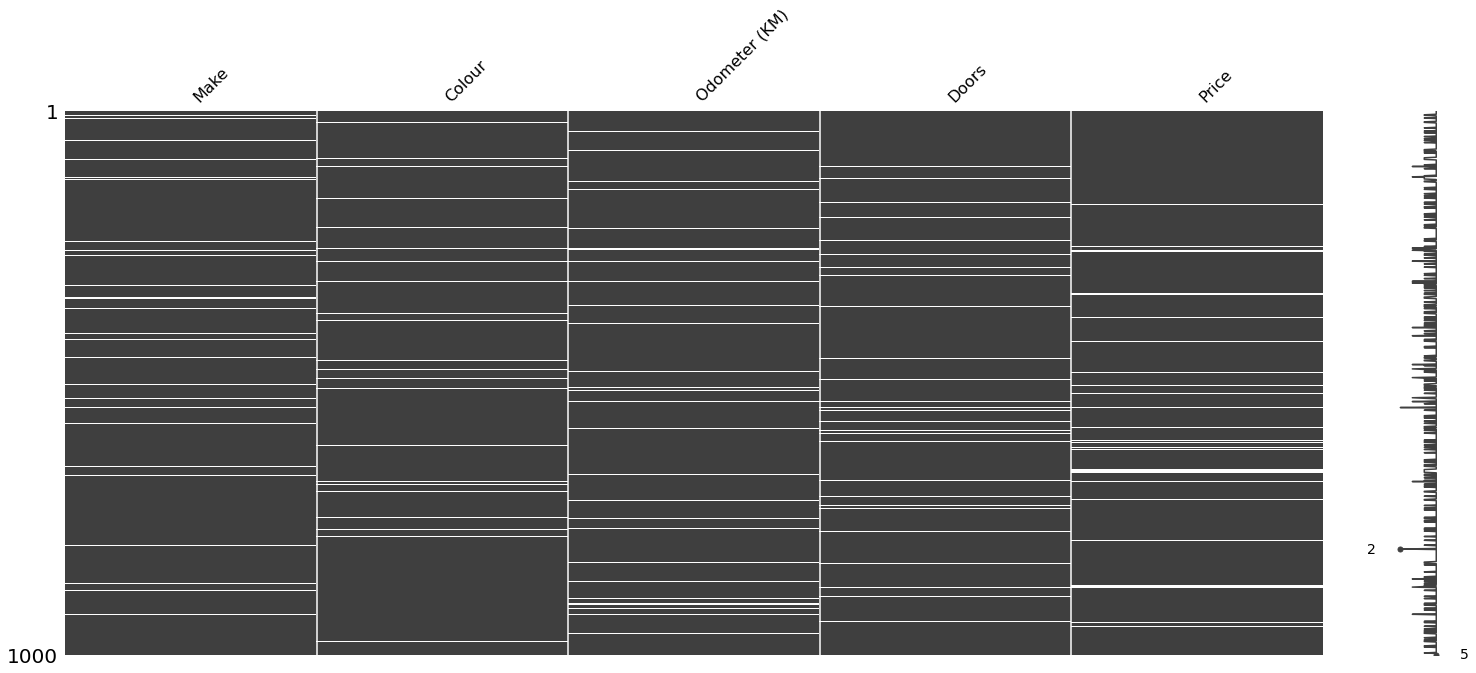

In [5]:
# Visualising the DataFrame to see where the missing values are.
msno.matrix(car_sales)

In [6]:
# First things first. Removing rows that's missing Labels (in this case "Price" is the target column).
car_sales.dropna(axis="index", how="any", subset=["Price"], inplace=True)

In [7]:
# Filling missing values for categorical variables "Make" & "Colour"
car_sales["Make"].fillna("missing", inplace=True)
car_sales["Colour"].fillna("missing", inplace=True)

In [8]:
# Imputing missing values for categorical-numerical variable "Doors"
car_sales["Doors"].fillna(car_sales["Doors"].median(), inplace=True)

In [9]:
# Filling missing values for continuous numerical variable "Odometer (KM)"
car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(), inplace=True)

In [10]:
# Checking if the missing values were handled succesfully
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

- #### Handling missing values **Using Sci-kit Learn**

In [11]:
# Importing the Dataset
c_sales = pd.read_csv("SklearnSampleData/car_sales.csv")

In [12]:
# First things first. Removing rows that has no Labels (in this case "Price" is the target column).
c_sales.dropna(axis="index", how="any", subset=["Price"], inplace=True)

In [13]:
# Importing the necessary sklearn Libraries & Class objects
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Define transformers (SimpleImputer objects that contains the Fill Strategy and Fill values)
# fill Categorical Variables with "missing" and Numerical variables with the column/feature "mean or median"
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="median")
num_imputer = SimpleImputer(strategy="mean")

## Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

## Create an imputer (a ColumnTransformer object that fills missing data)
# ColumnTransformer takes a List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)],
    remainder="passthrough")

## Transform the Data
# fit_transform - Fit all transformers, transform the data and concatenate results.
c_sales = imputer.fit_transform(c_sales)  # remember that it returns a numpy.ndarray

In [14]:
c_sales = pd.DataFrame(c_sales, columns=["Make", "Colour", "Doors", "Odometer (KM)", "Price"])

In [15]:
c_sales.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
Price            0
dtype: int64

### **B.** Extracting Feature Variables & Target Variable

In [16]:
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0


In [17]:
# Splitting the Dataset into Feature Variables(X) & Target Variable(y).
X_car = car_sales.iloc[:, 0:4]
y_car = car_sales.iloc[:, 4]

### **C.** Splitting X, y into train & test sets

> **Note:** For Encoding/Model Selection/feature selection, To prevent data leakage, it is good practice to split your data into train and test subsets first. Feature selection can then be formed **using just the training set. Notice that whenever we use fit or fit_transform, we only use the training set.**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.25, random_state=16)

X_test.shape, X_train.shape, y_test_car.shape, y_train_car.shape

((238, 4), (712, 4), (238,), (712,))

### **D.** Converting the Categorical Variables into Numerical Variables

> **Note:** As the categorical variables are not ordinal, here we used the One-hot encoding technique. In order to avoid data leakage, the encoding is fit on the training set and then applied to both train and test sets. As the target variable is already numerical, we don't have to transform it.

In [19]:
X_train.shape, X_test.shape

((712, 4), (238, 4))

In [20]:
# import statements
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Encoding the input variables

# instantiating one-hot-encoder object (the transformer)
onehot_encoder = OneHotEncoder(sparse=False)

# defining columns to be used with ColumnTransformer
cat_variables = ["Make", "Colour", "Doors"]

# intansiating the ColumnTranformer
col_transformer = ColumnTransformer([
    ("one-hot", onehot_encoder, cat_variables)],
    remainder="passthrough")

# fitting the encoder to training set (X_train)
col_transformer.fit(X_train)

# transforming both training & test set (X_train, X_test)
X_train_car = col_transformer.transform(X_train)
X_test_car = col_transformer.transform(X_test)

In [21]:
pd.DataFrame(X_train_car).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31277.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33261.0


# **Picking a Suitable Model/Estimator**

#### Chose your model using the Scikit-Learn **machine learning map**: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img src="Ref/ML_ZTM/sklearn-ml-map.png" width=600/>

In [22]:
# A Demo using the Boston House Pricing Dataset

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=12)

Here we are dealing with a regression problem. With the help of the Scikit-Learn Machine Learning map we have decided to use `RidgeRegression` Algorithm to build our QuAM (Question Answering Machine).

> **Note:** For Encoding/Model Selection/Feature Selection, To prevent data leakage, it is good practice to split your data into train and test subsets first. Feature selection can then be formed **using just the train dataset. Notice that whenever we use fit or fit_transform, we only use the train dataset.**

In [24]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.746460154645328

# **Training the Model and Making Predictions** 

Every Algorithm Available in the Sci-kit Learn Library has a Function, `fit()`, which is used for Model Training; and to Make Predictions two Functions are Used, `predict()` & `predict_proba()`. But, `predict_proba()` is Only Available to the Classification Algorithms.

- `predict()` vs. `predict_proba()`: `predict()` returns a certain prediction whereas, `predict_proba()` returns the probabilities of the clasification labels.

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [26]:
clf.predict_proba(X_test[:2])

array([[0.92, 0.08],
       [0.  , 1.  ]])

In [27]:
clf.predict(X_test[0:2])

array([0, 1])

# **Model Evaluation**

> Documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

## Model Evaluation Procedures

**Motivation:** Need a way to evaluate machine learning models in order to choose the best performing machine learning model.

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data

**Alternative idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

**But,** it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy. 

**Question:** So what can we do?  
**Ans:** What we can do is we can create a bunch of train/test splits, calculate the testing accuracy for each, and average the results together. And that's the essense of **cross-validation!**

<img src="Ref/ML_ZTM/sklearn-cross-validation.png" width=700/>

**So what's the Catch?**

- In the case of **cross-validation:**

    - More accurate estimate of out-of-sample accuracy
    - More "efficient" use of data (every observation is used for both training and testing)

- As for **train/test split:**

    - Runs K times faster than K-fold cross-validation
    - Simpler to examine the detailed results of the testing process

## We can Evaluate the Quality of a Model in three different ways,
   
    - Estimator `score` method.
    - Problem specific metric functions.
    - The `scoring` parameter.

### **A.** Estimator `score` method

In [28]:
# For a classification Algorithm it returns the mean accuracy on the given test data and labels.
# For a regression Algorithm it returns the coefficient of determination R^2 on the prediction.

In [29]:
clf.score(X_test, y_test)

0.9298245614035088

### **B.** Problem Specific Metric Functions

> Documentation : https://scikit-learn.org/stable/modules/model_evaluation.html

#### **-->** Mostly used Evaluation Techniques for **Classification** Problems are,

> All the available classification metrics are at - https://scikit-learn.org/stable/modules/classes.html#classification-metrics

- #### Accuracy

> Accuracy is measured as how many predictions (out of 100), made by the model on the test set matches the actual ground truth labels (test labels).  
Read the doc at - https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [30]:
from sklearn.metrics import accuracy_score
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.9298245614035088

- #### Area under the ROC curve

> ROC means receiver operating characteristic Curve & AUC indicates the area under the ROC curve. ROC-AUC curves plots the comparison of a models' true positive rate (tpr) vs. a models' false positive rate (fpr).  
Read the documentation at - https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics.

> Understanding ROC-AUC: https://www.notion.so/Machine-Learning-Model-Evaluation-Understanding-ROC-AUC-436ed437a6534d53a315f1e388df351e

> **Note**: The AUC - ROC curve is only for binary classification problems. But we can extend it to multi-class classification problems by using the One vs All technique. To know more read - https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/  |  https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case

In [31]:
# ROC-AUC Curves are better understood by Visualizing the curve

> **Note:** For multiple Machine Learning Models the higher the AUC the better the model.

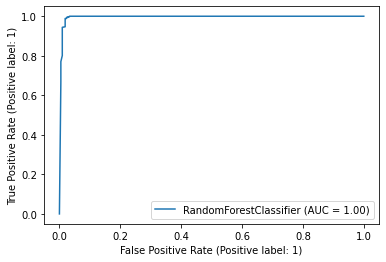

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

# As ROC plots tpr vs fpr at different thresholds and, probabilities of positives (classification label 1)
# are requried to calculate those values.
y_preds = clf.predict_proba(X_test)
y_pos_probs = y_preds[:, -1]

fpr, tpr, thresholds = roc_curve(y_test, y_pos_probs)
RFC_auc = roc_auc_score(y_test, y_pos_probs)
plot_roc_curve(clf, X, y)

In [33]:
RFC_auc

0.9741161616161615

- #### Confusion Matrix 

> The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class. To Understand the concept of Confusion Matrix read - https://www.notion.so/Confusion-Matrix-8304989b2eb343959ddd8388231e3331

In [34]:
# A Demo of using Confusion matrix to evaluate Classification Models.

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data
y = iris.target
class_labels = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [36]:
# The confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)  # to normalize the results set normalize="all"

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

In [38]:
# Visualizing the Confusion Matrix

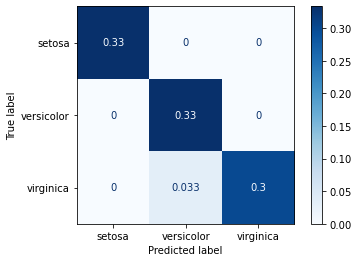

In [39]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model, X_test, y_test, display_labels=class_labels, cmap=plt.cm.Blues, normalize="all")

- #### Classification Report

> Build a text report showing the main classification metrics. Read the docs at - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [40]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, y_preds, target_names=class_labels, digits=3, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.909091,1.000000,0.966667,0.969697,0.969697
recall,1.0,1.000000,0.900000,0.966667,0.966667,0.966667
f1-score,1.0,0.952381,0.947368,0.966667,0.966583,0.966583
support,10.0,10.000000,10.000000,0.966667,30.000000,30.000000


#### **To summarize** classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

#### **-->** Mostly used Evaluation Techniques for **Regression** Problems are,

> All the available regression metrics are at - https://scikit-learn.org/stable/modules/classes.html#regression-metrics

#### These are Some of the Mathematical Equations of Different Regression Evaluation metrics -

<img src="Ref/formula-MAE-MSE-RMSE-RSquared.JPG"/>

- #### R^2 (R-Squared) AKA Coefficient of Determination

> To understand the concept of Coefficient of Determination, read - https://www.notion.so/Machine-Learning-Model-Evaluation-Understanding-Coefficient-of-Determination-r-squared-c3c1951e5bbe4adea4cbc201833321e7  
> Read the documentation at - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

> What R-squared does is it Compares your models predictions to the mean of the targets. The Values of R-squared can range from 0 (a very poor model) to 1.  For example, if the model predicts the mean of the targets for all test samples, it's R^2 value would be 0. And if the model predicts a range of numbers that perfectly matches the target values it's R^2 value would be 1.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=12)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.8775203118400885

- #### Mean Absolute Error (MAE)

> It represents the mean Deviation of the Data points, with respect to the Regression Line. It's also termed as Unexplained Deviation. Read the doc at - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.2670882352941164

- #### Mean Squared Error (MSE) 

> It represents the mean of squared Deviation of the Data points, with respect to the Regression Line. It's also termed as Standard Error or Variation of Regression. Read the doc at - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds, squared=True)  # if squared is set to False returns the RMSE value.

10.007851578431364

### **C.** Evaluating a model using the `scoring` parameter

The `scoring` parameter is used with **cross-validation techniques** (such as, `model_selection.cross_val_score` and `model_selection.GridSearchCV`) to define the model evaluation rules as cross-validation depends on an internal scoring strategy.

> See all the available scoring strategies at - https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10, scoring="roc_auc")

array([1.        , 0.97012987, 0.98809524, 0.96296296, 1.        ,
       0.99801587, 0.99140212, 0.99867725, 0.9973545 , 1.        ])

## What we can do to improve the evaluation process further?

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

# **Improving a QuAM Through Experimentation**

>First predictions = baseline predictions.  
>First model = baseline model.

- **What are the Points We Can Work on?**
    - From a Data Perspective:
        - Could we collect more data? (generally, the more data, the better) 
        - Could we improve our data? 

    - From a Model Perspective:
        * Is there a better model we could use?
        * Could we improve the current model? 

    - Tuning Hyperparameters
        - Hyperparameters vs. Parameters
            * Parameters = model find these patterns in data
            * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns
        - Three ways to adjust hyperparameters:
            - By hand
            - Randomly with RandomSearchCV
            - Exhaustively with GridSearchCV

**Note:**
When you start exploring various model architectures (ie. different hyperparameter values), you also need a way to evaluate each model's ability to generalize to unseen data. However, if you use the testing data for this evaluation, you'll end up "fitting" the model architecture to the testing data - losing the ability to truely evaluate how the model performs on unseen data. This is sometimes referred to as "data leakage".

To mitigate this, we'll end up splitting the total dataset into three subsets: training data, validation data, and testing data. The introduction of a validation dataset allows us to evaluate the model on different data than it was trained on and select the best model architecture, while still holding out a subset of the data for the final evaluation at the end of our model development.

You can also leverage more advanced techniques such as K-fold cross validation in order to essentially combine training and validation data for both learning the model parameters and evaluating the model without introducing data leakage.

> Understand Grid Search and Random Search - https://www.notion.so/Improving-Machine-Learning-Models-Hyperparameter-Tuning-Grid-Search-Random-Search-561d2661eab64873948b49a8027c32fa

> Random Forest, Hyper Parameters to Tune - https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

#### Creating A Baseline Model to Apply GridSearchCV & RandomSearchCV for Tuning the Hyperparameters

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor()
cross_val_score(model, X_train_car, y_train_car, cv=10, scoring="r2").mean()

0.1913014389342649

### GridSearchCV (Scikit-Learn Grid Search Library)

> Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [48]:
grid_params = {"max_depth":[3, 5, 8], 
               "min_samples_split": [15, 50, 250, 400], 
               "max_leaf_nodes": [3, 12, 23], 
               "min_samples_leaf": [20, 80, 300], 
               "n_estimators": [10, 40, 100]}

In [49]:
# importing the library
from sklearn.model_selection import GridSearchCV

# setting up random seed so that the results are reproduceable
np.random.seed(3)
# intantiating a Grid Search Object
grid = GridSearchCV(model, param_grid=grid_params, scoring="r2", cv=10)
# fitting the grid
grid.fit(X_train_car, y_train_car)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 8], 'max_leaf_nodes': [3, 12, 23],
                         'min_samples_leaf': [20, 80, 300],
                         'min_samples_split': [15, 50, 250, 400],
                         'n_estimators': [10, 40, 100]},
             scoring='r2')

In [50]:
grid.best_estimator_

RandomForestRegressor(max_depth=5, max_leaf_nodes=12, min_samples_leaf=20,
                      min_samples_split=15, n_estimators=10)

In [51]:
grid.best_score_

0.2733969450326417

In [52]:
grid.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 12,
 'min_samples_leaf': 20,
 'min_samples_split': 15,
 'n_estimators': 10}

In [53]:
grid.score(X_test_car, y_test_car)

0.3541979848167205

### RandomizedSearchCV (Scikit-Learn Random Search Library)

- **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [54]:
param_distributions = {"max_depth":list(range(1, 15)), 
               "min_samples_split": list(range(50, 200)), 
               "max_leaf_nodes": list(range(20, 50)), 
               "min_samples_leaf": list(range(10, 30)), 
               "n_estimators": list(range(5, 20))}

In [55]:
# importing the library
from sklearn.model_selection import RandomizedSearchCV

# setting up random seed so that the results are reproduceable
np.random.seed(3)
# intantiating a Grid Search Object
rnd = RandomizedSearchCV(model, n_iter=30, param_distributions=param_distributions, scoring="r2", cv=10)
# fitting the grid
rnd.fit(X_train_car, y_train_car)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'max_leaf_nodes': [20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39,
                                                           40, 41, 42, 43, 44,
                                                           45, 46, 47, 48, 49],
                                        'min_samples_leaf': [10, 11, 12, 13, 14,
                                                             15, 16, 17, 18, 19,
                                                             20, 21, 22, 23, 24,
                                                      

In [56]:
rnd.best_estimator_

RandomForestRegressor(max_depth=14, max_leaf_nodes=23, min_samples_leaf=10,
                      min_samples_split=126, n_estimators=19)

In [57]:
rnd.best_score_

0.30247099782572706

In [58]:
rnd.best_params_

{'n_estimators': 19,
 'min_samples_split': 126,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 23,
 'max_depth': 14}

In [59]:
rnd.score(X_test_car, y_test_car)

0.3757865688661286

# **Saving and Reloading a Trained Machine Learning Model** 

- ### Using the `pickle` Library

In [60]:
# import statements
import pickle
# saving a trained model
pickle.dump(rnd, open("car_sales_RF_pickle.pkl", "wb"))

In [62]:
# reloading the model
csrf = pickle.load(open("car_sales_RF_pickle.pkl", "rb"))

In [63]:
# making predictions with the loaded model
csrf.score(X_test_car, y_test_car)

0.3757865688661286

- ### Using `joblib` Library 

In [64]:
# import statements
from joblib import dump, load
# saving a model
dump(grid, filename="car_sales_RF_joblib.joblib")

['car_sales_RF_joblib.joblib']

In [65]:
# loading in a model
csgrf = load(filename="car_sales_RF_joblib.joblib")

In [66]:
# making predictions
csgrf.score(X_test_car, y_test_car)

0.3541979848167205